### Library, load data, data cleaning and imputation

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [95]:
sacog = pd.read_excel('sacog_with_new_variables.xlsx')

In [12]:
# Treat no reponse as never
def instore_only(row, cat):
    efreq = 'May_Freq_E' + cat
    freq = 'May_Freq_' + cat
    if ((row[efreq] == 1) | (row[efreq] == 0)) & (row[freq] > 1):
        return 1
    else: 
        return 0

In [13]:
def online_only(row, cat):
    efreq = 'May_Freq_E' + cat
    freq = 'May_Freq_' + cat
    if ((row[freq] == 1) | (row[freq] == 0)) & (row[efreq] > 1):
        return 1
    else: 
        return 0

In [14]:
def both(row, cat):
    efreq = 'May_Freq_E' + cat
    freq = 'May_Freq_' + cat
    if (row[efreq] > 1) & (row[freq] > 1):
        return 1
    else: 
        return 0

In [15]:
def noshopping(row, cat):
    efreq = 'May_Freq_E' + cat
    freq = 'May_Freq_' + cat
    if (row[efreq] <= 1) & (row[freq] <= 1):
        return 1
    else: 
        return 0

In [16]:
for cat in ['PreparedFood', 'Groceries', 'OtherFood', 'PaperCleaning', 'Clothing','HomeOffice','Medication','ChildcareItems']:
    sacog['instore-only-'+cat] = sacog.apply(lambda row: instore_only(row, cat), axis = 1)
    sacog['online-only-'+cat] = sacog.apply(lambda row: online_only(row, cat), axis = 1)
    sacog['both-'+cat] = sacog.apply(lambda row: both(row, cat), axis = 1)
    sacog['noshopping-'+cat] = sacog.apply(lambda row: noshopping(row, cat), axis = 1)

In [17]:
def style(row, cat):
    if row['instore-only-'+cat] == 1:
        return 1
    if row['both-'+cat] == 1:
        return 2
    if row['online-only-'+cat] == 1:
        return 3
    if row['noshopping-'+cat] == 1:
        return 0

In [18]:
for cat in ['PreparedFood', 'Groceries', 'OtherFood', 'PaperCleaning', 'Clothing','HomeOffice','Medication','ChildcareItems']:
    sacog['style-'+cat] = sacog.apply(lambda row: style(row, cat), axis = 1)


In [19]:
sacog[['style-PreparedFood', 'style-Groceries', 'style-OtherFood', 'style-PaperCleaning', 
     'style-Clothing', 'style-HomeOffice', 'style-Medication', 'style-ChildcareItems']].describe()

,style-PreparedFood,style-Groceries,style-OtherFood,style-PaperCleaning,style-Clothing,style-HomeOffice,style-Medication,style-ChildcareItems
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.00000,327.000000
mean,1.455657,1.363914,0.807339,1.238532,1.489297,1.021407,1.24159,0.415902
std,0.830971,0.585338,0.951045,0.820359,1.038688,1.066573,0.98441,0.888642
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.00000,0.000000
75%,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.00000,0.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000


### KMeans

In [22]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
X_ = sacog[['style-PreparedFood', 'style-Groceries', 'style-OtherFood', 'style-PaperCleaning', 
     'style-Clothing', 'style-HomeOffice', 'style-Medication', 'style-ChildcareItems']]
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, n_init = 25, max_iter = 1000, random_state = 0)
    km = km.fit(X_)
    Sum_of_squared_distances.append(km.inertia_)

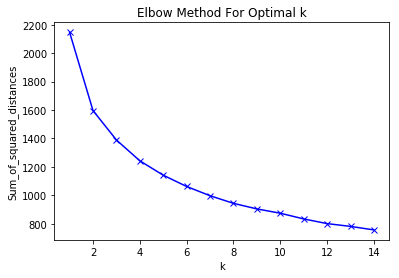

In [23]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

(array([0, 1, 2, 3, 4], dtype=int32), array([97, 75, 43, 67, 45]))

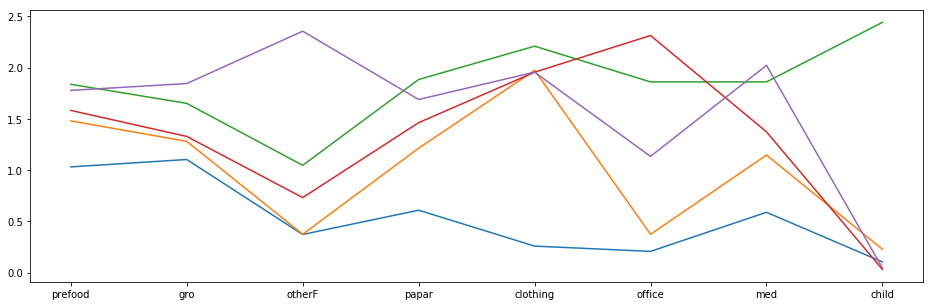

In [24]:
km5 = KMeans(n_clusters=5, n_init = 25, max_iter = 1000, random_state = 0)
km5 = km5.fit(X_)
display(np.unique(km5.labels_, return_counts=True))
#display(km5.cluster_centers_)

sacog[km5.labels_ == 0]

plt.figure(figsize=(16, 5))
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], km5.cluster_centers_.T)

### KModes

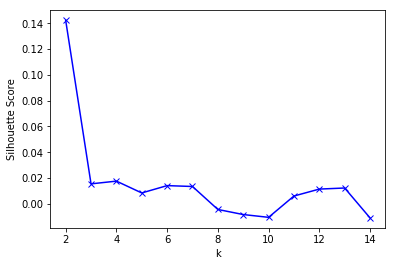

In [30]:
silhouette_score_ = []
X_ = sacog[['style-PreparedFood', 'style-Groceries', 'style-OtherFood', 'style-PaperCleaning', 
     'style-Clothing', 'style-HomeOffice', 'style-Medication', 'style-ChildcareItems']]
K = range(2,15)
for k in K:
    km = KModes(n_clusters=k, n_init = 25, max_iter = 1000, random_state = 0)
    km = km.fit(X_)
    silhouette_score_.append(silhouette_score(X_, km.labels_))
    
plt.plot(K, silhouette_score_, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
#plt.title('Elbow Method For Optimal k')
plt.show()

(array([0, 1, 2, 3], dtype=uint16), array([137,  78,  50,  62]))

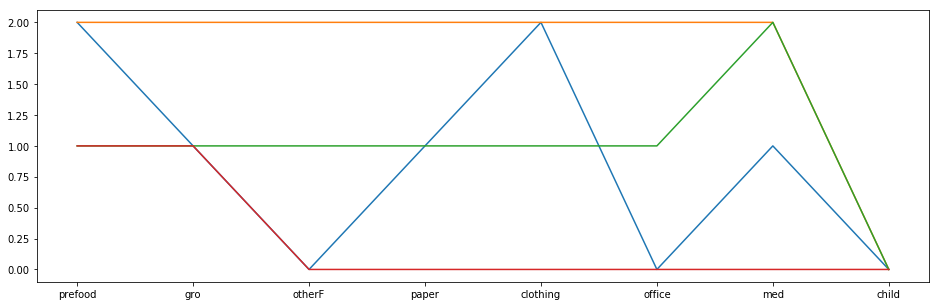

In [26]:
km4 = KModes(n_clusters=4, n_init = 25, max_iter = 1000, random_state = 0)
km4 = km4.fit(X_)
display(np.unique(km4.labels_, return_counts=True))
#display(km5.cluster_centers_)

sacog[km4.labels_ == 0]

plt.figure(figsize=(16, 5))
plt.plot(['prefood', 'gro', 'otherF', 'paper','clothing', 'office', 'med', 'child'], km4.cluster_centroids_.T)

#### Orange: do both in-person and online for essential (food, grocery, paper) and online only for non-essential (clothing and office)
#### Purple: do both in-person and online for both essential and non-essential products
#### Blue: do both instore and online for prepared food and clothing, other essentials like grocery, paper, medicine are purchased in store only.
#### Green: do most of the purchase in-store, but purchase medicine both in-store and online
#### Red: buy food in-store and do no shopping for other categories.

(array([0, 1, 2, 3, 4], dtype=uint16), array([124,  40,  48,  59,  56]))

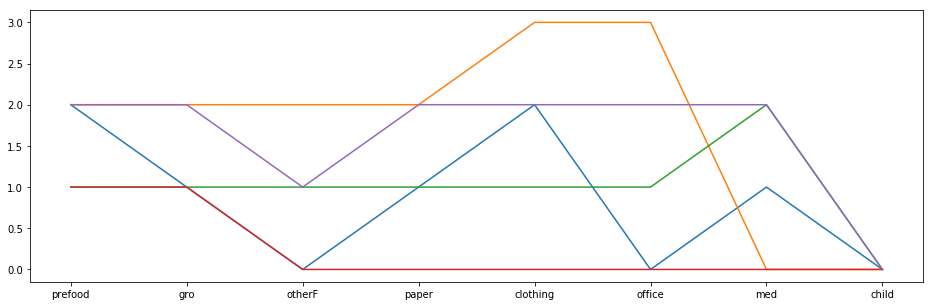

In [196]:
km5 = KModes(n_clusters=5, n_init = 25, max_iter = 1000, random_state = 0)
km5 = km5.fit(X_)
display(np.unique(km5.labels_, return_counts=True))
#display(km5.cluster_centers_)

sacog[km5.labels_ == 0]

plt.figure(figsize=(16, 5))
plt.plot(['prefood', 'gro', 'otherF', 'paper','clothing', 'office', 'med', 'child'], km5.cluster_centroids_.T)

In [210]:
sacog[['May_Freq_EPreparedFood', 'May_Freq_EGroceries', 'May_Freq_EOtherFood', 'May_Freq_EPaperCleaning', 'May_Freq_EClothing', 'May_Freq_EHomeOffice', 'May_Freq_EMedication', 'May_Freq_EChildcareItems']].describe()
sacog[['May_Freq_EPreparedFood', 'May_Freq_EGroceries', 'May_Freq_EOtherFood', 'May_Freq_EPaperCleaning', 'May_Freq_EClothing', 'May_Freq_EHomeOffice', 'May_Freq_EMedication', 'May_Freq_EChildcareItems']].replace(0, 1).replace(1, np.NaN).describe()

,May_Freq_EPreparedFood,May_Freq_EGroceries,May_Freq_EOtherFood,May_Freq_EPaperCleaning,May_Freq_EClothing,May_Freq_EHomeOffice,May_Freq_EMedication,May_Freq_EChildcareItems
count,181.000000,115.000000,68.000000,112.000000,183.000000,117.000000,137.000000,51.000000
mean,4.248619,3.800000,3.558824,2.848214,3.240437,2.743590,3.211679,3.411765
std,0.999478,1.085793,1.070393,1.148519,1.377649,1.059878,1.133907,1.444666
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,4.000000,4.000000,4.000000,2.000000,3.000000,2.000000,3.000000,3.000000
75%,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.500000
max,7.000000,7.000000,7.000000,6.000000,7.000000,5.000000,5.000000,7.000000


In [208]:
sacog[['May_Freq_PreparedFood', 'May_Freq_Groceries', 'May_Freq_OtherFood', 'May_Freq_PaperCleaning', 'May_Freq_Clothing', 'May_Freq_HomeOffice', 'May_Freq_Medication', 'May_Freq_ChildcareItems']].replace(0, 1).describe()
sacog[['May_Freq_PreparedFood', 'May_Freq_Groceries', 'May_Freq_OtherFood', 'May_Freq_PaperCleaning', 'May_Freq_Clothing', 'May_Freq_HomeOffice', 'May_Freq_Medication', 'May_Freq_ChildcareItems']].replace(0, 1).replace(1, np.NaN).describe()

,May_Freq_PreparedFood,May_Freq_Groceries,May_Freq_OtherFood,May_Freq_PaperCleaning,May_Freq_Clothing,May_Freq_HomeOffice,May_Freq_Medication,May_Freq_ChildcareItems
count,255.000000,309.000000,142.000000,247.000000,192.000000,145.000000,199.000000,47.000000
mean,4.066667,4.336570,3.316901,2.959514,2.348958,2.420690,2.849246,2.957447
std,0.975823,0.783343,0.940573,0.957629,0.595004,0.760747,0.868871,0.999075
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,4.000000,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,4.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000
75%,5.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000
max,7.000000,7.000000,6.000000,7.000000,4.000000,5.000000,5.000000,7.000000


In [38]:
# people who did not answer either shopping behaviors during the survey week or the shopping frequency question
#for cat in ['PreparedFood', 'Groceries', 'OtherFood', 'PaperCleaning', 'Clothing','HomeOffice','Medication','ChildcareItems']:
#    print(sacog[(sacog['May_Freq_'+cat] == 0)]['May-InStore-Trips-'+cat].value_counts())
#    print(sacog[(sacog['May-InStore-Trips-'+cat] == -9998)]['May_Freq_'+cat].value_counts())

### 1) Shopping style: relative frequency

### Split using both channels into more in-store, same, more online

In [3]:
def style_compare_consumption(row, cat):
    efreq = 'May_Freq_E' + cat
    freq = 'May_Freq_' + cat
    if ((row[efreq] <= 1) & (row[freq] <=1)):
        return 0   # no shopping
    elif (row[efreq] <= 1) & (row[freq] > 1):
        return 1   # in-store only
    elif (row[efreq] > 1) & (row[freq] > 1): # do both
        if row[freq] > row[efreq]:
            return 2 # more in-store
        elif row[freq] == row[efreq]:
            return 3 # same freq
        else:
            return 4 # more online
    else:
        return 5 # online only

In [20]:
sacog['style1-ChildcareItems'].value_counts()

0    261
5     19
1     15
3     14
4     12
2      6
Name: style1-ChildcareItems, dtype: int64

In [33]:
for cat in ['PreparedFood', 'Groceries', 'OtherFood', 'PaperCleaning', 'Clothing','HomeOffice','Medication','ChildcareItems']:
    sacog['style1-'+cat] = sacog.apply(lambda row: style_compare_consumption(row, cat), axis = 1)

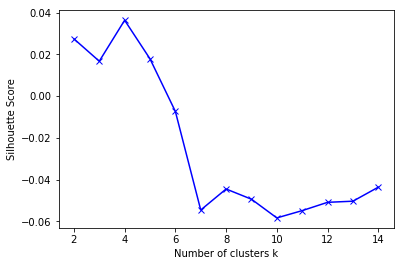

In [4]:
silhouette_score_ = []
X_ = sacog[['style1-PreparedFood', 'style1-Groceries', 'style1-OtherFood', 'style1-PaperCleaning', 
     'style1-Clothing', 'style1-HomeOffice', 'style1-Medication', 'style1-ChildcareItems']]
K = range(2,15)
for k in K:
    km = KModes(n_clusters=k, n_init = 25, max_iter = 1000, random_state = 0)
    km = km.fit(X_)
    silhouette_score_.append(silhouette_score(X_, km.labels_))
    
plt.plot(K, silhouette_score_, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
#plt.title('Elbow Method For Optimal k')
plt.show()

(array([0, 1, 2, 3], dtype=uint16), array([183,  67,  48,  29]))

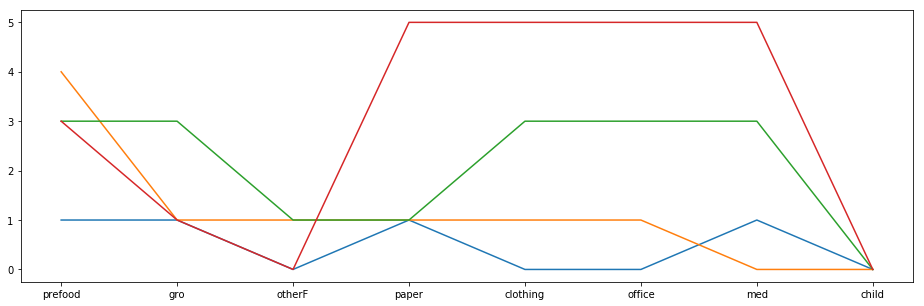

In [5]:
km4 = KModes(n_clusters=4, n_init = 25, max_iter = 1000, random_state = 0)
km4 = km4.fit(X_)
display(np.unique(km4.labels_, return_counts=True))
#display(km5.cluster_centers_)

sacog[km4.labels_ == 0]

plt.figure(figsize=(16, 5))
plt.plot(['prefood', 'gro', 'otherF', 'paper','clothing', 'office', 'med', 'child'], km4.cluster_centroids_.T)

In [37]:
km4.cluster_centroids_

array([[1, 1, 0, 1, 0, 0, 1, 0],
       [4, 1, 1, 1, 1, 1, 0, 0],
       [3, 3, 1, 1, 3, 3, 3, 0],
       [3, 1, 0, 5, 5, 5, 5, 0]])

#### Kmeans

In [5]:
Sum_of_squared_distances = []
X_ = sacog[['style1-PreparedFood', 'style1-Groceries', 'style1-OtherFood', 'style1-PaperCleaning', 
     'style1-Clothing', 'style1-HomeOffice', 'style1-Medication', 'style1-ChildcareItems']]
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, n_init = 25, max_iter = 1000, random_state = 0)
    km = km.fit(X_)
    Sum_of_squared_distances.append(km.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

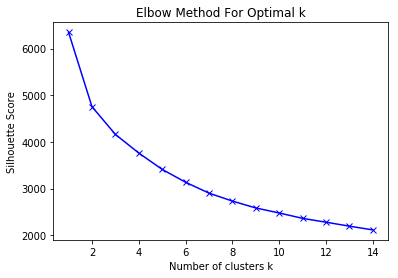

In [6]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method For Optimal k')
plt.show

(array([0, 1, 2, 3], dtype=int32), array([ 88,  68,  36, 135]))

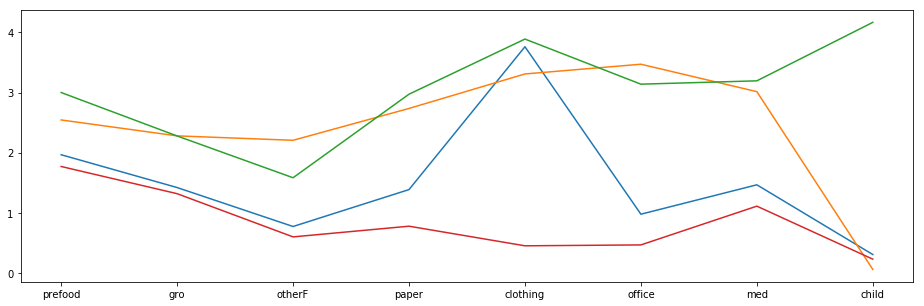

In [7]:
km4 = KMeans(n_clusters=4, n_init = 25, max_iter = 1000, random_state = 0)
km4 = km4.fit(X_)
display(np.unique(km4.labels_, return_counts=True))
#display(km5.cluster_centers_)

sacog[km4.labels_ == 0]

plt.figure(figsize=(16, 5))
plt.plot(['prefood', 'gro', 'otherF', 'paper','clothing', 'office', 'med', 'child'], km4.cluster_centers_.T)

In [8]:
x = X_.iloc[:,[0,1,4,6]]
x_ = x[(x != 0).all(1)]

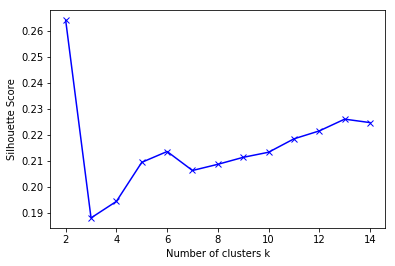

In [10]:
silhouette_score_ = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k, n_init = 25, max_iter = 1000, random_state = 0)
    km = km.fit(X_)
    silhouette_score_.append(silhouette_score(X_, km.labels_))
    
plt.plot(K, silhouette_score_, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
#plt.title('Elbow Method For Optimal k')
plt.show()

(array([0, 1, 2, 3, 4], dtype=int32), array([ 36, 122,  68,  67,  34]))

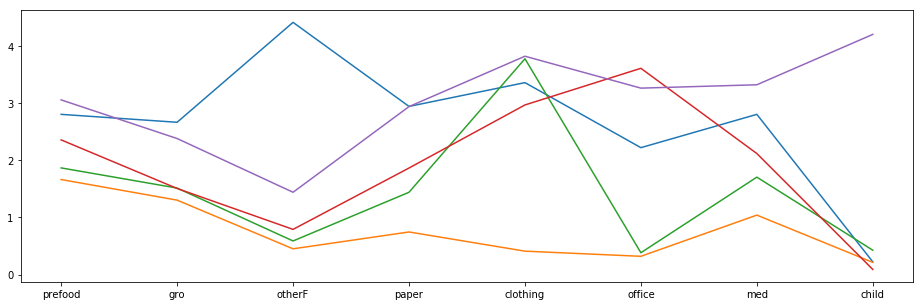

In [76]:
km5 = KMeans(n_clusters=5, n_init = 25, max_iter = 1000, random_state = 0)
km5 = km5.fit(X_)
display(np.unique(km5.labels_, return_counts=True))
#display(km5.cluster_centers_)

plt.figure(figsize=(16, 5))
plt.plot(['prefood', 'gro', 'otherF', 'paper','clothing', 'office', 'med', 'child'], km5.cluster_centers_.T)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([ 64,  55,  48,  35, 102,  23]))

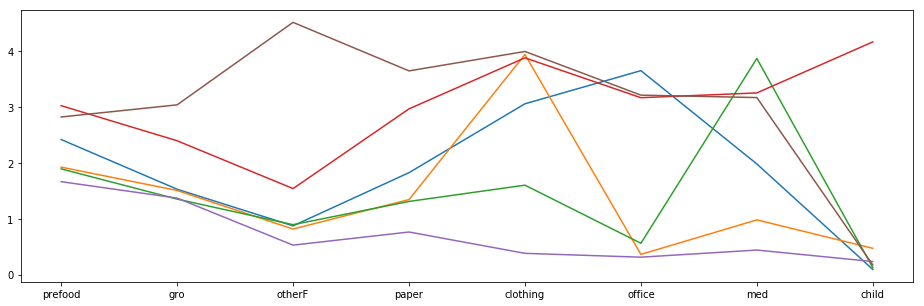

In [33]:
km6 = KMeans(n_clusters=6, n_init = 25, max_iter = 1000, random_state = 0)
km6 = km6.fit(X_)
display(np.unique(km6.labels_, return_counts=True))
#display(km5.cluster_centers_)

plt.figure(figsize=(16, 5))
plt.plot(['prefood', 'gro', 'otherF', 'paper','clothing', 'office', 'med', 'child'], km6.cluster_centers_.T)

In [74]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#sacog[sacog['style1-Clothing'] == 5]['style1-PreparedFood'].value_counts()
#plt.figure(figsize=(20, 10))
#plt.subplot(131)
#sns.distplot(sacog[sacog['style1-Clothing'] == 5]['style1-PreparedFood'], bins = [0,1,2,3,4,5,6])
#plt.subplot(132)
#sns.distplot(sacog[sacog['style1-Clothing'] == 4]['style1-PreparedFood'], bins = [0,1,2,3,4,5,6])
#plt.subplot(133)
#sns.distplot(sacog[sacog['style1-Clothing'] == 3]['style1-PreparedFood'], bins = [0,1,2,3,4,5,6])

### 2) Shopping style - proportion of online shopping

<function matplotlib.pyplot.show(*args, **kw)>

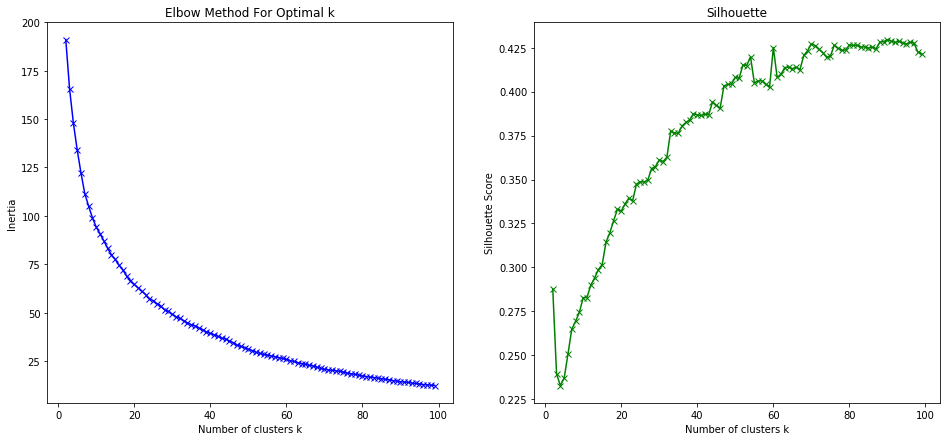

In [101]:
Sum_of_squared_distances = []
silhouette_score_ = []
X_ = sacog[['May-Portion-EPreparedFood', 'May-Portion-EGroceries', 'May-Portion-EOtherFood', 'May-Portion-EPaperCleaning', 
     'May-Portion-EClothing', 'May-Portion-EHomeOffice', 'May-Portion-EMedication']]
X_ = X_.fillna(0)
K = range(2,100)
for k in K:
    km = KMeans(n_clusters=k, n_init = 25, max_iter = 1000, random_state = 0)
    km = km.fit(X_)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_score_.append(silhouette_score(X_, km.labels_))
    

plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_score_, 'gx-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette')
plt.show

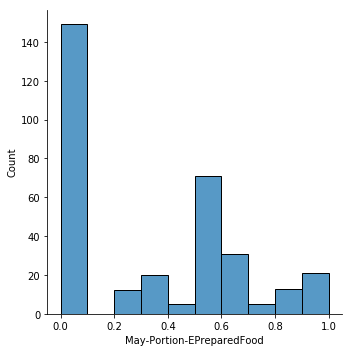

In [114]:
X_.describe()
sns.displot(X_['May-Portion-EPreparedFood'])

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([34, 77, 21, 52, 26, 53, 42, 22]))

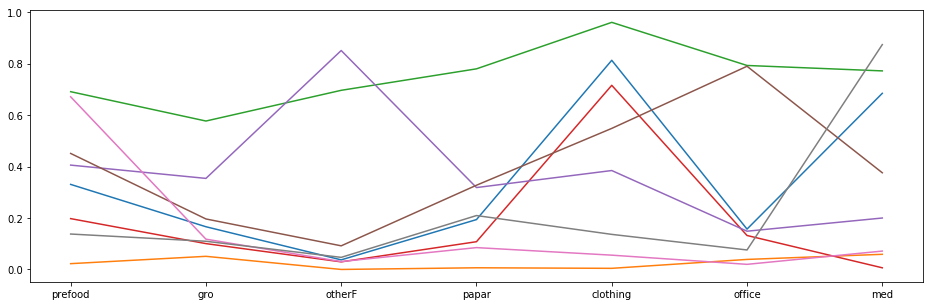

In [108]:
km = KMeans(n_clusters=8, n_init = 25, max_iter = 1000, random_state = 5)
km = km.fit(X_)

display(np.unique(km.labels_, return_counts=True))
plt.figure(figsize=(16, 5))
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med'], km.cluster_centers_.T)

In [109]:
[np.round(x, 2) for x in km.cluster_centers_]

[array([0.33, 0.17, 0.04, 0.19, 0.81, 0.16, 0.68]),
 array([0.02, 0.05, 0.  , 0.01, 0.  , 0.04, 0.06]),
 array([0.69, 0.58, 0.7 , 0.78, 0.96, 0.79, 0.77]),
 array([0.2 , 0.1 , 0.03, 0.11, 0.72, 0.13, 0.01]),
 array([0.41, 0.35, 0.85, 0.32, 0.38, 0.15, 0.2 ]),
 array([0.45, 0.2 , 0.09, 0.33, 0.55, 0.79, 0.38]),
 array([0.67, 0.12, 0.03, 0.08, 0.06, 0.02, 0.07]),
 array([0.14, 0.11, 0.05, 0.21, 0.14, 0.08, 0.87])]

In [ ]:
pastYear = []

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([46, 24, 55, 79, 37, 27, 59]))

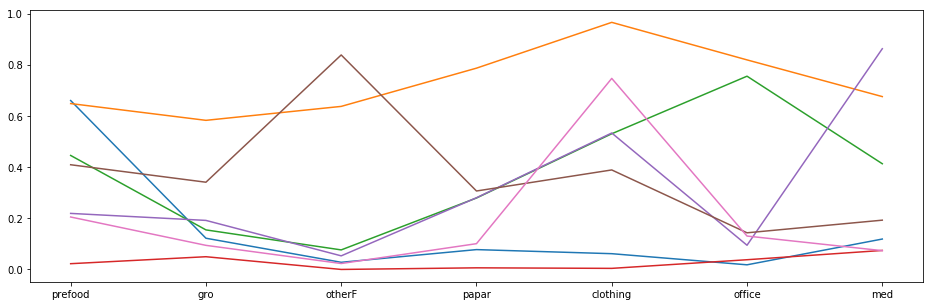

In [110]:
km = KMeans(n_clusters=7, n_init = 25, max_iter = 1000, random_state = 5)
km = km.fit(X_)

display(np.unique(km.labels_, return_counts=True))
plt.figure(figsize=(16, 5))
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med'], km.cluster_centers_.T)

In [112]:
[np.round(x, 2) for x in km.cluster_centers_]

[array([0.66, 0.12, 0.03, 0.08, 0.06, 0.02, 0.12]),
 array([0.65, 0.58, 0.64, 0.79, 0.97, 0.82, 0.68]),
 array([0.45, 0.15, 0.08, 0.28, 0.53, 0.76, 0.41]),
 array([0.02, 0.05, 0.  , 0.01, 0.  , 0.04, 0.07]),
 array([0.22, 0.19, 0.05, 0.28, 0.53, 0.09, 0.86]),
 array([0.41, 0.34, 0.84, 0.31, 0.39, 0.14, 0.19]),
 array([0.2 , 0.09, 0.02, 0.1 , 0.75, 0.13, 0.07])]

In [100]:
X_[km.labels_ == 3]

,May-Portion-EPreparedFood,May-Portion-EGroceries,May-Portion-EOtherFood,May-Portion-EPaperCleaning,May-Portion-EClothing,May-Portion-EHomeOffice,May-Portion-EMedication,May-Portion-EChildcareItems
18,1.000000,0.500000,0.833333,1.000000,1.000000,0.0,1.000000,0.0
35,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.0
64,0.500000,0.800000,0.500000,1.000000,1.000000,1.0,0.000000,0.0
76,0.600000,0.200000,0.666667,0.500000,1.000000,1.0,0.000000,0.0
82,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0
111,0.333333,0.285714,0.960000,0.857143,0.500000,0.5,0.666667,0.0
155,0.500000,0.333333,0.666667,0.666667,0.923077,0.5,0.666667,0.0
159,0.444444,0.666667,0.000000,1.000000,1.000000,1.0,0.000000,0.0
174,0.666667,0.666667,1.000000,0.500000,1.000000,1.0,0.333333,1.0
176,0.333333,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0


In [102]:
total = sacog[['May-Total-PreparedFood', 'May-Total-Groceries', 'May-Total-OtherFood', 'May-Total-PaperCleaning', 
     'May-Total-Clothing', 'May-Total-HomeOffice', 'May-Total-Medication','May-Total-ChildcareItems']]
total['label'] = km.labels_
total['label'] = total['label'].map({0: 'Eclothing', 1: 'EOffice', 2: 'EMed', 3: 'Dep', 4: 'Efood', 5: 'Ind', 6: 'Partial', 7:'PrepF'})

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:2254: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)
/Users/apple/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


May-Total-ChildcareItems         AxesSubplot(0.1,0.736957;0.363636x0.163043)
May-Total-Clothing          AxesSubplot(0.536364,0.736957;0.363636x0.163043)
May-Total-Groceries              AxesSubplot(0.1,0.541304;0.363636x0.163043)
May-Total-HomeOffice        AxesSubplot(0.536364,0.541304;0.363636x0.163043)
May-Total-Medication             AxesSubplot(0.1,0.345652;0.363636x0.163043)
May-Total-OtherFood         AxesSubplot(0.536364,0.345652;0.363636x0.163043)
May-Total-PaperCleaning              AxesSubplot(0.1,0.15;0.363636x0.163043)
May-Total-PreparedFood          AxesSubplot(0.536364,0.15;0.363636x0.163043)
dtype: object

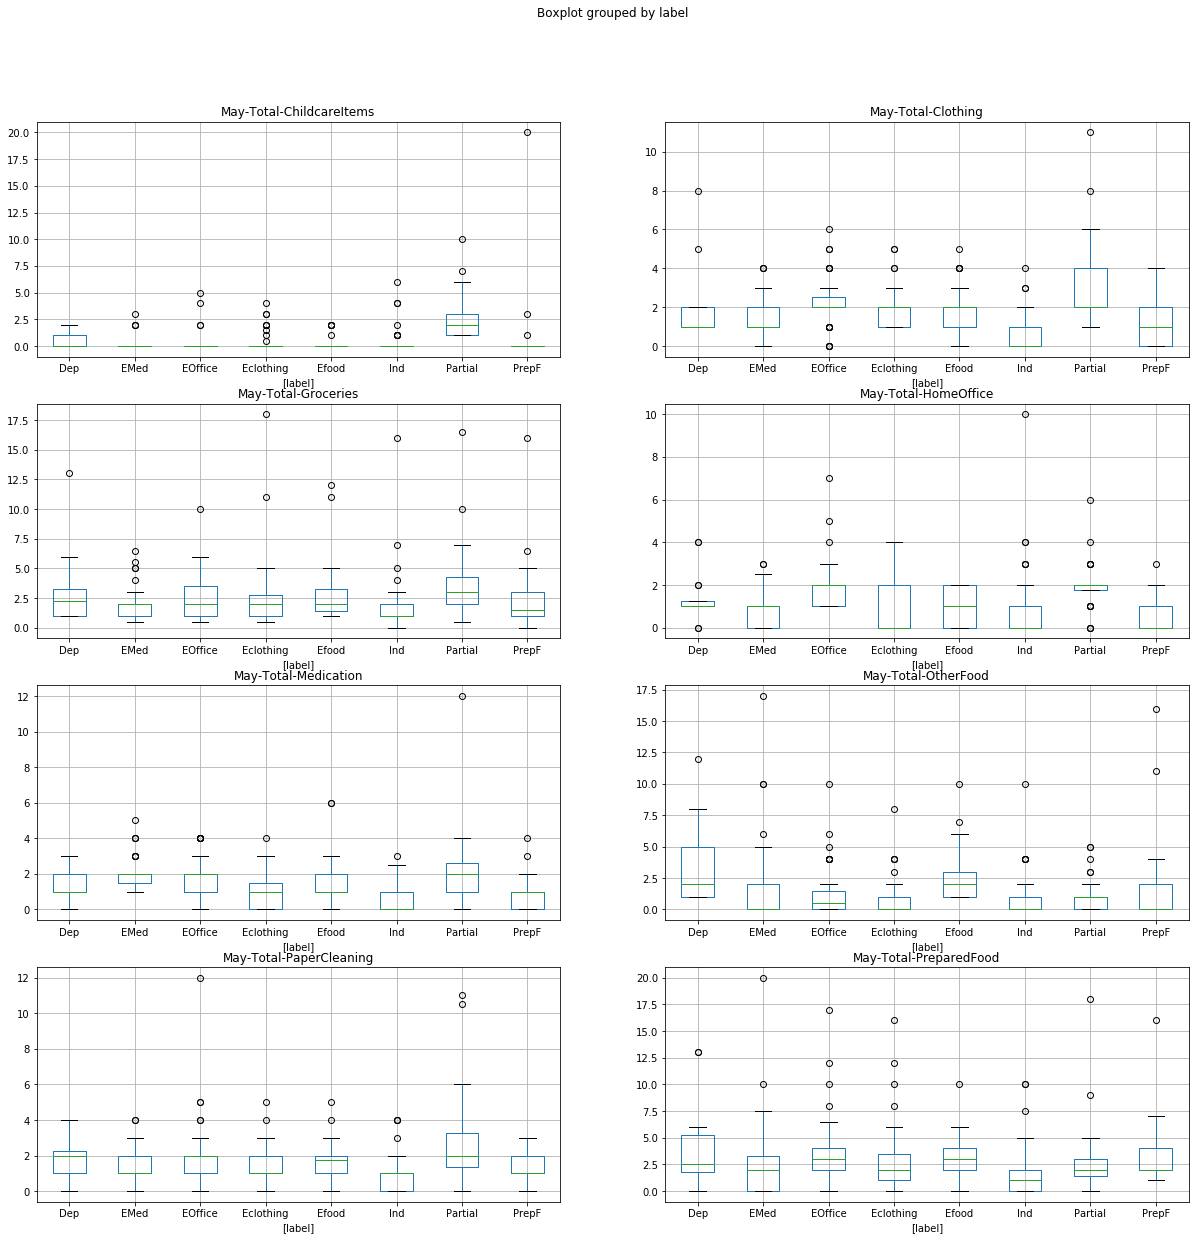

In [104]:
from matplotlib import pyplot
fig, axes = plt.subplots(4, 2, figsize=(20, 20), sharey=False)
total.boxplot(by='label', return_type='axes', ax=axes)

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

<Figure size 1440x720 with 0 Axes>

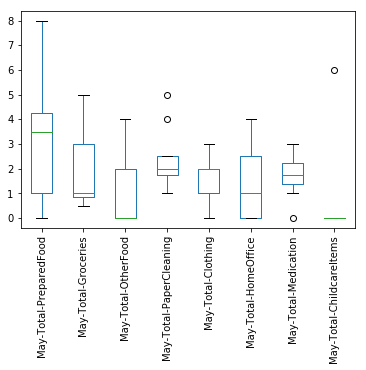

In [91]:
#fig, axes = plt.subplots(4, 2, figsize=(20, 30), sharey=False)
plt.figure(figsize = (20, 10))
total[:8].plot(kind = 'box')
plt.xticks(rotation='vertical')

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:2254: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specifi

May-Orders-ChildcareItems         AxesSubplot(0.1,0.736957;0.363636x0.163043)
May-Orders-Clothing          AxesSubplot(0.536364,0.736957;0.363636x0.163043)
May-Orders-Groceries              AxesSubplot(0.1,0.541304;0.363636x0.163043)
May-Orders-HomeOffice        AxesSubplot(0.536364,0.541304;0.363636x0.163043)
May-Orders-Medication             AxesSubplot(0.1,0.345652;0.363636x0.163043)
May-Orders-OtherFood         AxesSubplot(0.536364,0.345652;0.363636x0.163043)
May-Orders-PaperCleaning              AxesSubplot(0.1,0.15;0.363636x0.163043)
May-Orders-PreparedFood          AxesSubplot(0.536364,0.15;0.363636x0.163043)
dtype: object

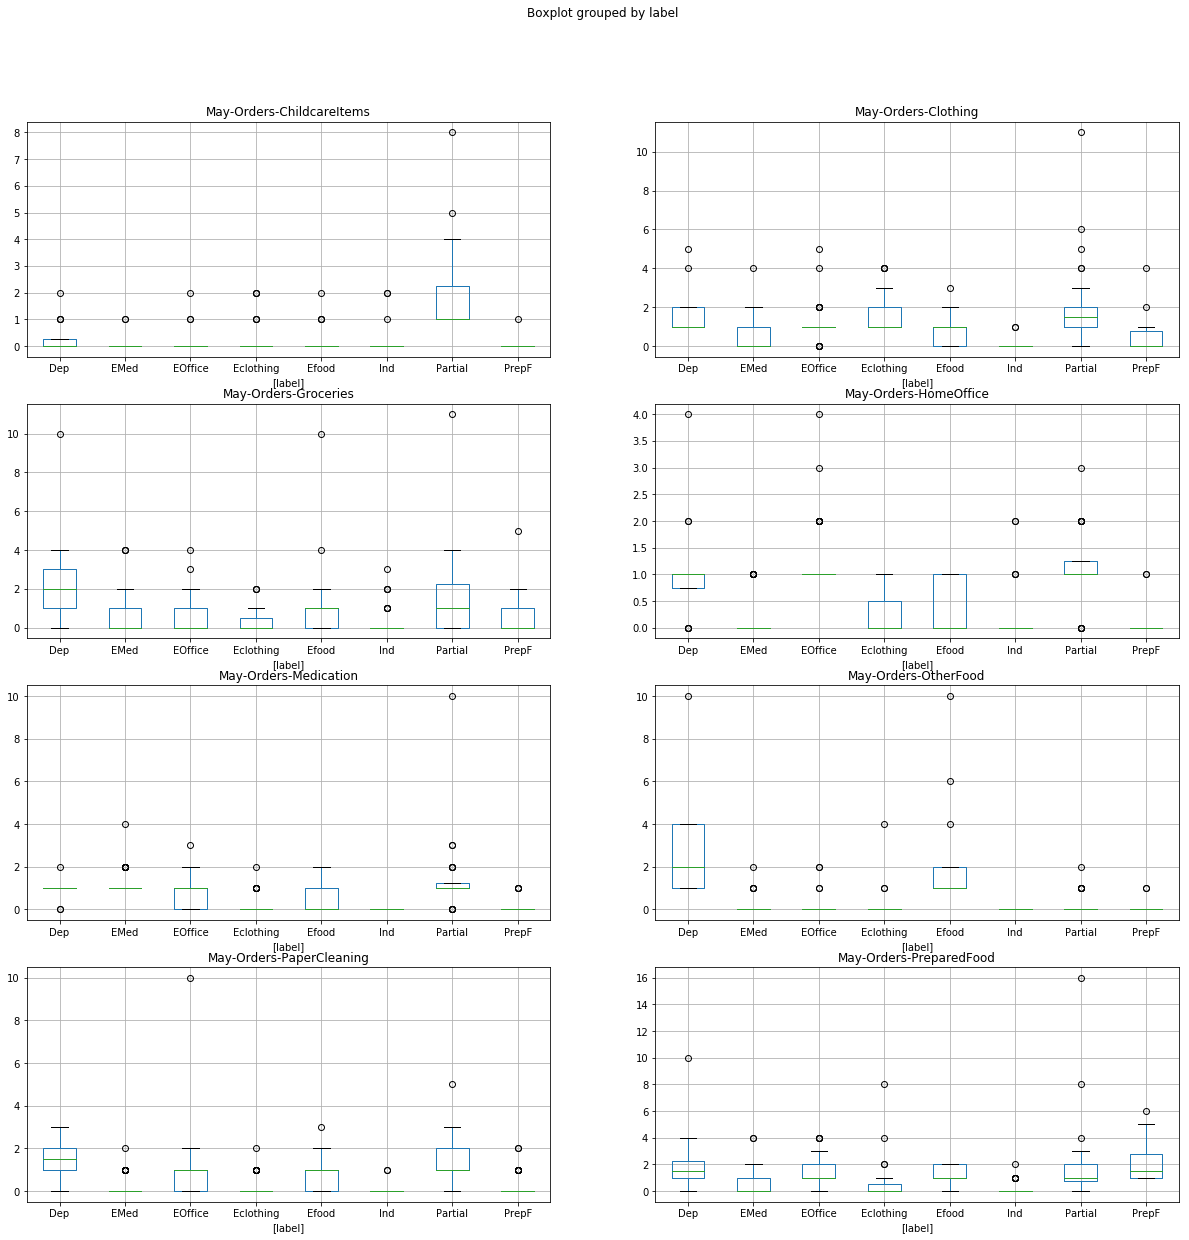

In [105]:
online = sacog[['May-Orders-PreparedFood', 'May-Orders-Groceries', 'May-Orders-OtherFood', 'May-Orders-PaperCleaning', 
     'May-Orders-Clothing', 'May-Orders-HomeOffice', 'May-Orders-Medication','May-Orders-ChildcareItems']]
online['label'] = km.labels_
online['label'] = online['label'].map({0: 'Eclothing', 1: 'EOffice', 2: 'EMed', 3: 'Dep', 4: 'Efood', 5: 'Ind', 6: 'Partial', 7:'PrepF'})
fig, axes = plt.subplots(4, 2, figsize=(20, 20), sharey=False)
online.boxplot(by='label', return_type='axes', ax=axes)

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:2254: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specifi

May-Trips-ChildcareItems         AxesSubplot(0.1,0.736957;0.363636x0.163043)
May-Trips-Clothing          AxesSubplot(0.536364,0.736957;0.363636x0.163043)
May-Trips-Groceries              AxesSubplot(0.1,0.541304;0.363636x0.163043)
May-Trips-HomeOffice        AxesSubplot(0.536364,0.541304;0.363636x0.163043)
May-Trips-Medication             AxesSubplot(0.1,0.345652;0.363636x0.163043)
May-Trips-OtherFood         AxesSubplot(0.536364,0.345652;0.363636x0.163043)
May-Trips-PaperCleaning              AxesSubplot(0.1,0.15;0.363636x0.163043)
May-Trips-PreparedFood          AxesSubplot(0.536364,0.15;0.363636x0.163043)
dtype: object

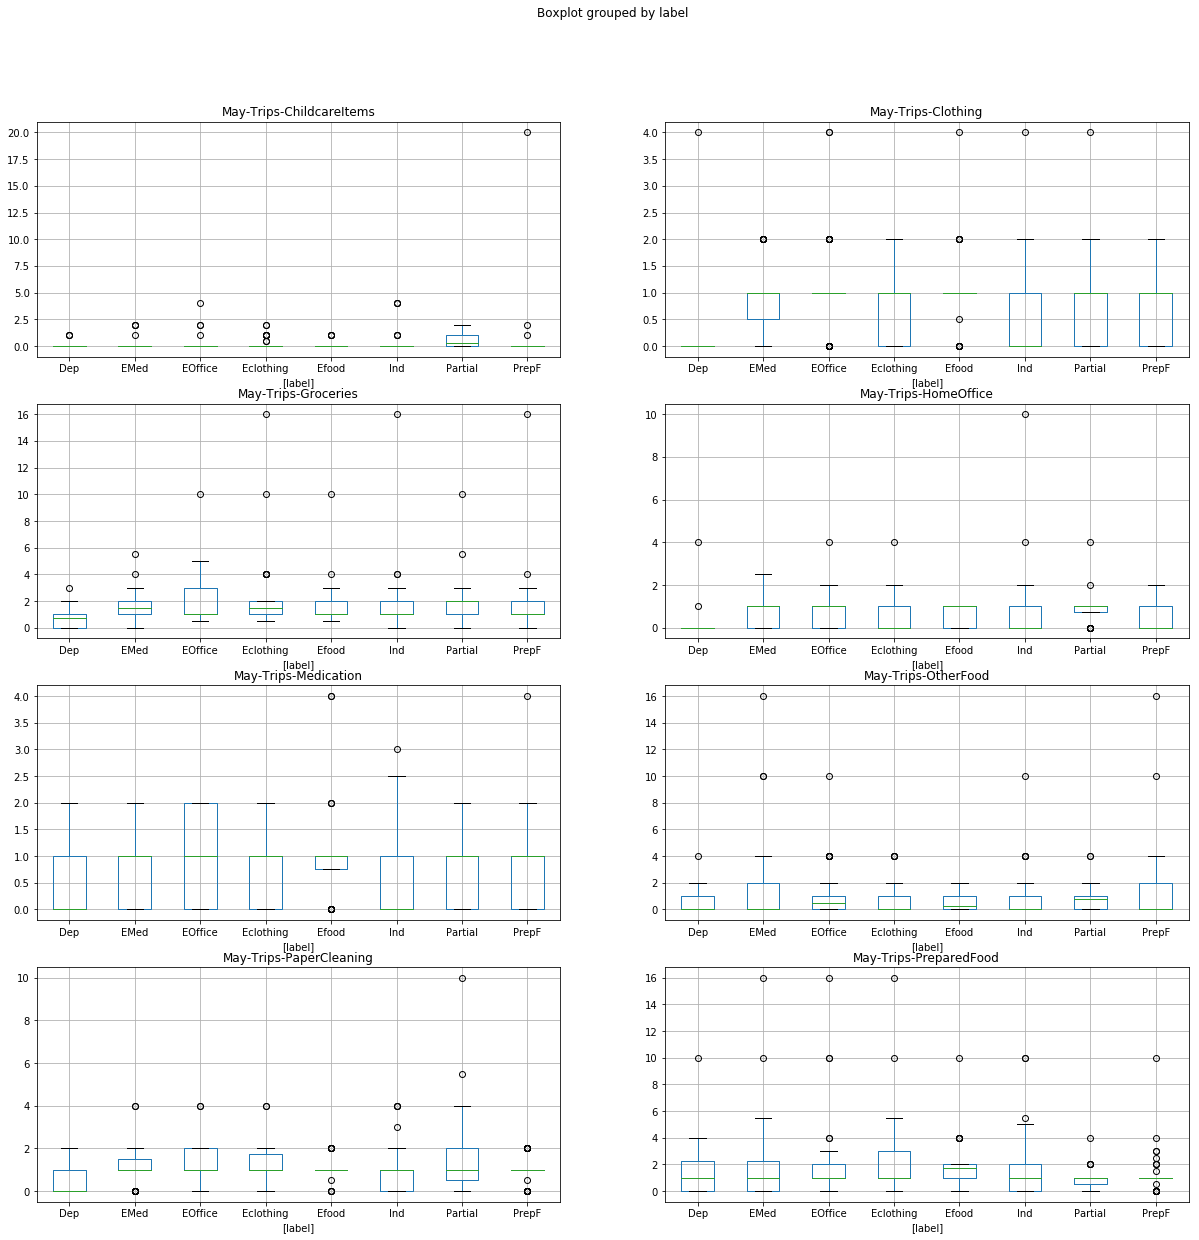

In [107]:
instore = sacog[['May-Trips-PreparedFood', 'May-Trips-Groceries', 'May-Trips-OtherFood', 'May-Trips-PaperCleaning', 
     'May-Trips-Clothing', 'May-Trips-HomeOffice', 'May-Trips-Medication','May-Trips-ChildcareItems']]
instore['label'] = km.labels_
instore['label'] = instore['label'].map({0: 'Eclothing', 1: 'EOffice', 2: 'EMed', 3: 'Dep', 4: 'Efood', 5: 'Ind', 6: 'Partial', 7:'PrepF'})
fig, axes = plt.subplots(4, 2, figsize=(20, 20), sharey=False)
instore.boxplot(by='label', return_type='axes', ax=axes)

<function matplotlib.pyplot.show(*args, **kw)>

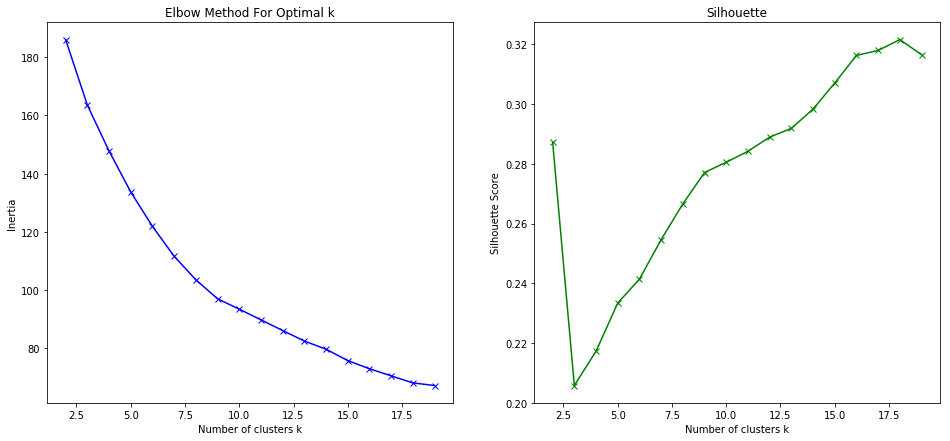

In [53]:
Sum_of_squared_distances = []
silhouette_score_ = []
X_ = sacog[['May-Portion-EPreparedFood', 'May-Portion-EGroceries', 'May-Portion-EOtherFood', 'May-Portion-EPaperCleaning', 
     'May-Portion-EClothing', 'May-Portion-EHomeOffice', 'May-Portion-EMedication']]
X_ = X_.fillna(0)
K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k, n_init = 25, max_iter = 1000, random_state = 0)
    km = km.fit(X_)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_score_.append(silhouette_score(X_, km.labels_))
    
plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_score_, 'gx-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette')
plt.show

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([85, 35, 50, 29, 31, 41, 16, 40]))

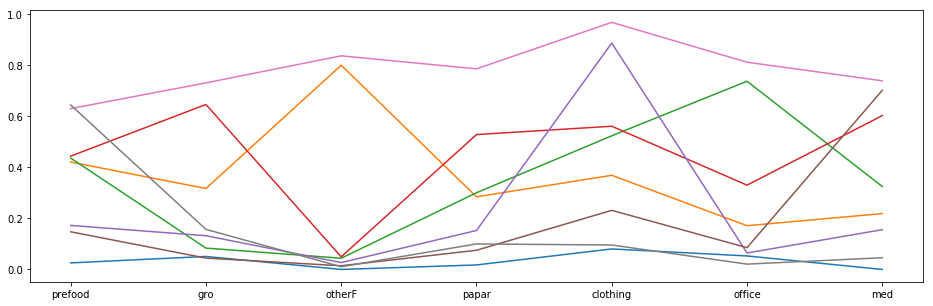

In [56]:
km = KMeans(n_clusters=8, n_init = 25, max_iter = 1000, random_state = 0)
km = km.fit(X_)

display(np.unique(km.labels_, return_counts=True))
plt.figure(figsize=(16, 5))
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med'], km.cluster_centers_.T)

In [57]:
[np.round(x, 2) for x in km.cluster_centers_]

[array([ 0.03,  0.05, -0.  ,  0.02,  0.08,  0.05,  0.  ]),
 array([0.42, 0.32, 0.8 , 0.28, 0.37, 0.17, 0.22]),
 array([0.44, 0.08, 0.04, 0.3 , 0.52, 0.74, 0.33]),
 array([0.44, 0.65, 0.05, 0.53, 0.56, 0.33, 0.6 ]),
 array([0.17, 0.13, 0.03, 0.15, 0.89, 0.06, 0.16]),
 array([0.15, 0.04, 0.01, 0.08, 0.23, 0.09, 0.7 ]),
 array([0.63, 0.73, 0.84, 0.79, 0.97, 0.81, 0.74]),
 array([0.64, 0.16, 0.01, 0.1 , 0.1 , 0.02, 0.05])]

In [11]:
sacog.head(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Duration (in seconds),Response ID,May-WorkingHours,May-TelecommutingDays,May-Trips-Commuting,May-Trips-Medical,May-Trips-Gym,...,May-Total-HomeOffice,May-Portion-EHomeOffice,May-Orders-Medication,May-Trips-Medication,May-Total-Medication,May-Portion-EMedication,May-Orders-ChildcareItems,May-Trips-ChildcareItems,May-Total-ChildcareItems,May-Portion-EChildcareItems
0,0,0,0,1957,R_3HLKBXhTIWgpd5v,9 am to 5 pm (or similar),5,1,1,0,...,0.0,NaN,1,0.5,1.5,0.666667,0,0.0,0.0,NaN
1,1,1,1,1826,R_2dgBf5xYdf4pJDs,"I did not work from Sunday, May 17th through S...",-1,0,0,0,...,2.0,0.5,1,0.5,1.5,0.666667,0,0.0,0.0,NaN
2,2,2,2,1655,R_wXWh8mxuoPtnAWt,"I did not work from Sunday, May 17th through S...",-1,0,0,0,...,4.0,0.0,0,3.0,3.0,0.000000,0,0.0,0.0,NaN
3,3,3,3,2036,R_2TNwp9PZ6T9eKdl,9 am to 5 pm (or similar),0,8,2,0,...,4.0,0.5,2,1.0,3.0,0.666667,0,0.0,0.0,NaN
4,4,4,4,1856,R_1ouIsItTUyGkZBh,9 am to 5 pm (or similar),5,0,0,0,...,0.0,NaN,1,1.0,2.0,0.500000,0,0.0,0.0,NaN


### See if distribution of ecommerce frequency change

In [56]:
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
 
def independent_ttest_2(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # Sample size
    n1, n2 = len(data1), len(data2)
    df = n1 + n2 - 2
    # calculate standard errors
    se_p_2 = (sum((data1 - mean1)**2.0) + sum((data2 - mean2)**2.0))/df
    # standard error on the difference between the samples
    sed = sqrt(se_p_2)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / (sed*sqrt(1/n1 + 1/n2))
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

In [61]:
# Test if monthly purchase frequency of Ecommerce is different before and during COVID.
cat = ['PreparedFood', 'Groceries', 'OtherFood', 'PaperCleaning', 'Clothing','HomeOffice','Medication','ChildcareItems']
print(tabulate([[cat_, 
                     sacog['PastYear-Orders-'+cat_].mean(), 
                     sacog['May-Orders-'+cat_].mean(),
                     independent_ttest_2(sacog['PastYear-Orders-'+cat_], sacog['May-Orders-'+cat_], 0.05)[3]
                    ] for cat_ in cat], headers=['Category', 'PastYear', 'May',  'P-value']))    

Category          PastYear       May      P-value
--------------  ----------  --------  -----------
PreparedFood      1.79817   3.45566   1.86825e-07
Groceries         1.07034   1.73089   0.00932191
OtherFood         0.541284  0.804281  0.0572739
PaperCleaning     0.617737  0.948012  0.0257377
Clothing          1.19878   2.29664   8.55963e-05
HomeOffice        0.547401  0.844037  0.0078267
Medication        0.712538  1.34862   8.09665e-06
ChildcareItems    0.278287  0.740061  0.00500985


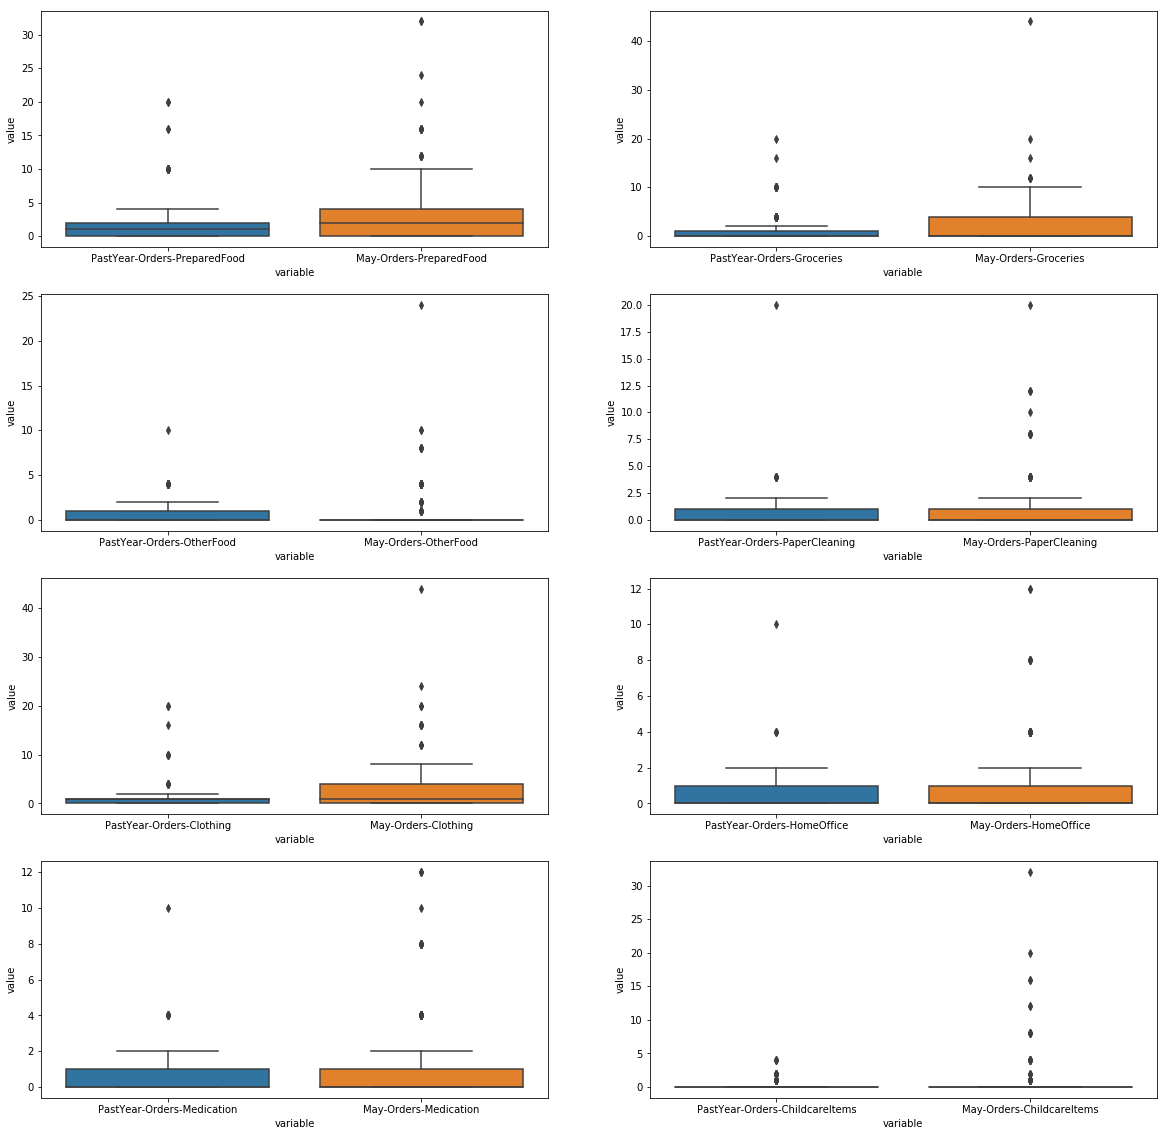

In [67]:
plt.figure(figsize = (20, 20))
for cat_ in cat:
    plt.subplot(4, 2, cat.index(cat_)+1)
    sns.boxplot(x="variable", y="value", data=pd.melt(sacog[['PastYear-Orders-'+cat_, 'May-Orders-'+cat_]]))

In [71]:
sacog['May-Orders-Clothing'].value_counts()

0     144
1      89
4      48
8      18
2      11
16      8
12      4
20      3
44      1
24      1
Name: May-Orders-Clothing, dtype: int64

In [84]:
pd.crosstab(index=sacog['PastYear-Tried-PreparedFood'], columns=sacog['style1-PreparedFood'])
#sacog[['PastYear-Tried-PreparedFood', 'style1-PreparedFood']]

style1-PreparedFood,0,1,2,3,4,5
PastYear-Tried-PreparedFood,,,,,,
0,40,60,11,23,15,7
1,12,34,25,50,37,13


In [96]:
pd.crosstab(index = sacog['PastYear_Freq_EPreparedFood'], columns = sacog['May_Freq_EPreparedFood'])

May_Freq_EPreparedFood,1,2,4,5,6,7,10,16
PastYear_Freq_EPreparedFood,,,,,,,,
1,130,12,48,18,1,1,1,1
2,8,3,20,10,1,1,0,0
4,15,1,13,16,6,0,0,0
10,5,0,3,5,3,1,0,0
16,0,0,1,1,0,0,0,0
20,0,0,1,1,0,0,0,0


In [92]:
sacog['PastYear_Freq_EPreparedFood'].value_counts()

1    123
2     56
4     51
3     43
0     33
5     17
7      2
6      2
Name: PastYear_Freq_EPreparedFood, dtype: int64

In [94]:
sacog['May_Freq_EPreparedFood'].value_counts()

4    86
1    79
0    67
5    52
3    16
6    12
2    12
7     3
Name: May_Freq_EPreparedFood, dtype: int64

In [ ]:
for cat_ in cat:
    sacog['PastYear_Freq_EPreparedFood']